In [3]:
from datetime import datetime as time
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import matplotlib.pyplot as plt
import glob
import numpy as np

c:\Users\tomtal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')

def generated_text(image_folder):

    start_time = time.now()

    for img in image_folder[0:5]:
        image = Image.open(img).convert("RGB")

        pixel_values = processor(images=image, return_tensors="pt").pixel_values
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        print("Extracted Text: ", generated_text)

    stop_time = time.now()

    print("Time: ", stop_time-start_time)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
folder_dir = glob.glob(r"C:\Main\Data\Postnord OCR testing + prod\testing_microsoft_huggingface\data")
generated_text(folder_dir)

Time:  0:00:00.000010


[[[ 50  52  38]
  [ 97 100  83]
  [103 102  82]
  ...
  [255 249 171]
  [252 245 167]
  [252 245 167]]

 [[ 42  44  30]
  [ 86  89  72]
  [ 93  92  72]
  ...
  [254 247 169]
  [252 245 167]
  [252 245 167]]

 [[ 40  42  28]
  [ 81  84  67]
  [ 92  91  71]
  ...
  [254 247 169]
  [253 246 168]
  [253 246 168]]

 ...

 [[ 25  24  19]
  [ 42  41  36]
  [ 41  40  35]
  ...
  [224 224 214]
  [248 248 238]
  [255 255 245]]

 [[ 25  24  19]
  [ 42  41  36]
  [ 41  40  35]
  ...
  [228 228 218]
  [250 250 240]
  [252 252 242]]

 [[ 24  23  18]
  [ 41  40  35]
  [ 40  39  34]
  ...
  [250 250 242]
  [255 254 245]
  [217 214 205]]]
Extracted Text:  BTM528


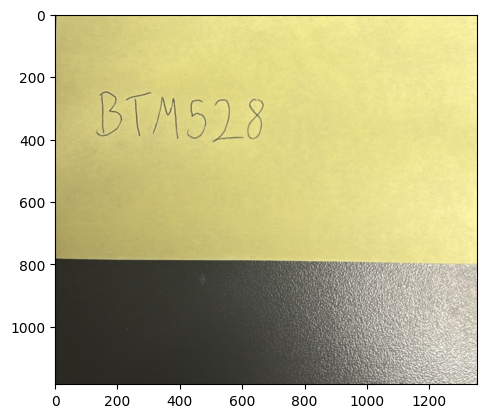

In [6]:
from matplotlib import transforms

img = plt.imread("3cc039cf-20250403-143911-729_Image_12.jpeg")
print(img)
#for x in range(3):
 #   img = np.rot90(img)
plt.imshow(img)

pixel_values = processor(images=img, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print("Extracted Text: ", generated_text)


In [7]:
from ultralytics import YOLO

model = YOLO(r"C:\Main\Data\Postnord OCR testing_prod\postnord_reader\runs\detect\train7\weights\best.pt")

In [8]:
res = model("3cc039cf-20250403-143911-729_Image_12.jpeg")
print(res)


image 1/1 c:\Main\Data\Postnord OCR testing_prod\testing_microsoft_huggingface\3cc039cf-20250403-143911-729_Image_12.jpeg: 576x640 1 OCR_AREA, 954.0ms
Speed: 5.3ms preprocess, 954.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'OCR_AREA'}
obb: None
orig_img: array([[[ 38,  52,  50],
        [ 83, 100,  97],
        [ 82, 102, 103],
        ...,
        [171, 249, 255],
        [167, 245, 252],
        [167, 245, 252]],

       [[ 30,  44,  42],
        [ 72,  89,  86],
        [ 72,  92,  93],
        ...,
        [169, 247, 254],
        [167, 245, 252],
        [167, 245, 252]],

       [[ 28,  42,  40],
        [ 67,  84,  81],
        [ 71,  91,  92],
        ...,
        [169, 247, 254],
        [168, 246, 253],
        [168, 246, 253]],

       ...,

       [[ 19,  24,  25],
        [ 36,  41,  42],
        [ 35,


image 1/1 c:\Main\Data\Postnord OCR testing_prod\testing_microsoft_huggingface\3cc039cf-20250403-143911-729_Image_12.jpeg: 576x640 1 OCR_AREA, 548.6ms
Speed: 4.3ms preprocess, 548.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)


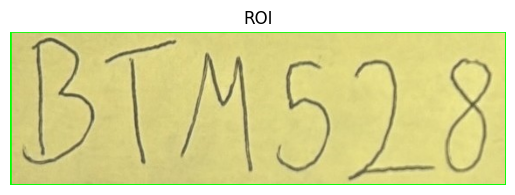

In [16]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO(r"C:\Main\Data\Postnord OCR testing_prod\postnord_reader\runs\detect\train7\weights\best.pt")

# Run prediction
result = model("3cc039cf-20250403-143911-729_Image_12.jpeg")[0]  # Get first result

# Extract the best bounding box
if result.boxes.conf.numel() > 0:  # Check if there are any bounding boxes
    best_conf_idx = result.boxes.conf.argmax()
    best_box = result.boxes.xyxy[best_conf_idx]
    x1, y1, x2, y2 = map(int, best_box.tolist())

    # Load original image
    orig_img = cv2.imread("3cc039cf-20250403-143911-729_Image_12.jpeg")

    # Draw rectangle
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(orig_img, f'{result.boxes.conf[best_conf_idx]:.2f}', (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Extract ROI and convert to grayscale
    roi = orig_img[y1:y2, x1:x2]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Show ROI using matplotlib (convert BGR to RGB for display)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("ROI")
    plt.axis("off")
    plt.show()
else:
    print("No bounding boxes detected.")


In [ ]:
    pixel_values = processor(images=img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(f"Extracted Text from {img_file}: {generated_text}")
    plt.imshow(img)
    plt.title(generated_text)

In [17]:
print("Antall bilder funnet:", len(image_files))
for img_file in image_files[:1]:
    img = Image.open(img_file).convert("RGB")
    for _ in range(3):
        img = np.rot90(img)
    pixel_values = processor(images=img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(f"Extracted Text from {img_file}: {generated_text}")
    plt.imshow(img)
    plt.title(generated_text)




NameError: name 'image_files' is not defined

In [ ]:
import easyocr
reader = easyocr.Reader(["en"])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
txt = reader.readtext(img, detail=1)
print(txt)

c:\Users\tomtal\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(111), np.int32(218)], [np.int32(695), np.int32(218)], [np.int32(695), np.int32(439)], [np.int32(111), np.int32(439)]], 'BTM528', np.float64(0.8250485233608206))]


In [ ]:
letters = reader.readtext(img, detail=0, allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ")
letters_text = "".join(letters).strip().upper()

numbers = reader.readtext(img, detail=0, allowlist="0123456789")
numbers_text = "".join(numbers).strip()

extracted_text = f"{letters_text[:3]}{numbers_text[-3:]}"

print(extracted_text)

BTM528


In [ ]:
def extract_text(image):
    try:
        # Ensure EasyOCR runs synchronously
        letters = reader.readtext(
            image, detail=0, allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        )
        letters_text = "".join(letters).strip().upper()

        numbers = reader.readtext(image, detail=0, allowlist="0123456789")
        numbers_text = "".join(numbers).strip()

        extracted_text = f"{letters_text[:3]}{numbers_text[-3:]}"
        logline(
            f"Extracted: {extracted_text} (Letters: {letters_text}, Numbers: {numbers_text})"
        )
        return extracted_text
    except Exception as e:
        logline(f"Error in extract_text: {e}")
        traceback.print_exc()
        return ""